In [38]:
import pandas as pd
import matplotlib.pyplot as pyplot

archs = [
    "single-layer-10-relu",
    "single-layer-5-relu",
    "single-layer-3-relu",
    "single-layer-1-relu",
    "dual-layer-30-10-relu",
    "dual-layer-20-10-relu",
    "dual-layer-30-5-relu",
    "dual-layer-20-5-relu",
    "dual-layer-30-3-relu",
    "dual-layer-20-3-relu",
    "triple-layer-40-20-10-relu",
    "triple-layer-30-20-10-relu",
    "triple-layer-30-20-5-relu",
    "triple-layer-40-20-5-relu",
    "triple-layer-40-15-5-relu",
    "triple-layer-30-15-3-relu",
    "quadruple-layer-40-20-10-5-relu",
    "quadruple-layer-40-15-8-3-relu",
    "quadruple-layer-40-15-8-1-relu"
]

partial_results = []
for i in range(0, 10):
    for a in archs:
        partial_results.append(
            (i+1, a, f"../../workdir-autoencoders-20250203-{i + 1}-{a}-denoising/final_defects_stats.csv", "denoising")
        )
        partial_results.append(
            (i+1, a, f"../../workdir-autoencoders-20250203-{i + 1}-{a}-featureselection/final_defects_stats.csv", "featureselection")
        )

def readall(p):
    csv = pd.read_csv(filepath_or_buffer=p[2], sep=',')
    csv['iteration'] = p[0]
    csv['autoencoder_arch'] = p[1]
    csv['autoencoder_mode'] = p[3]
    return csv

results = pd.concat([readall(p) for p in partial_results])
rfonly_results = results.loc[results.model_type == "unscaled-randomforest"]
description = results.groupby(["model_type", "autoencoder_arch", "autoencoder_mode"]).describe()

metric_describable_data = results.filter(["real_precision", "real_mcc", "autoencoder_arch", "model_type", "autoencoder_mode"])
metric_describable_data["mcc"] = metric_describable_data["real_mcc"]
metric_describable_data["precision"] = metric_describable_data["real_precision"]
metric_describable_data = metric_describable_data.filter(["precision", "mcc", "model_type", "autoencoder_mode", "autoencoder_arch"])

grouped_data = metric_describable_data.groupby(["model_type", "autoencoder_mode", "autoencoder_arch"]).describe()
grouped_data.style.to_latex(buf = "metrics-general.tex")

description = results.filter(["model_type", "autoencoder_arch", "autoencoder_mode", "real_mcc", "real_precision"]).groupby(["model_type", "autoencoder_arch", "autoencoder_mode"]).describe()
description

real_mcc  \
                                                                     count   
model_type            autoencoder_arch           autoencoder_mode            
scaled-linear-ridge   dual-layer-20-10-relu      denoising            50.0   
                                                 featureselection     50.0   
                      dual-layer-20-3-relu       denoising            50.0   
                                                 featureselection     50.0   
                      dual-layer-20-5-relu       denoising            50.0   
...                                                                    ...   
unscaled-randomforest triple-layer-40-15-5-relu  featureselection     50.0   
                      triple-layer-40-20-10-relu denoising            50.0   
                                                 featureselection     50.0   
                      triple-layer-40-20-5-relu  denoising            50.0   
                                                 featureselection     50.0   

                                                                             \
                                                                       mean   
model_type            autoencoder_arch           autoencoder_mode             
scaled-linear-ridge   dual-layer-20-10-relu      denoising         0.354991   
                                                 featureselection  0.339001   
                      dual-layer-20-3-relu       denoising         0.247841   
                                                 featureselection  0.181427   
                      dual-layer-20-5-relu       denoising         0.295701   
...                                                                     ...   
unscaled-randomforest triple-layer-40-15-5-relu  featureselection  0.387403   
                      triple-layer-40-20-10-relu denoising         0.456783   
                                                 featureselection  0.447927   
                      triple-layer-40-20-5-relu  denoising         0.410836   
                                                 featureselection  0.399967   

                                                                             \
                                                                        std   
model_type            autoencoder_arch           autoencoder_mode             
scaled-linear-ridge   dual-layer-20-10-relu      denoising         0.022045   
                                                 featureselection  0.027496   
                      dual-layer-20-3-relu       denoising         0.034276   
                                                 featureselection  0.037657   
                      dual-layer-20-5-relu       denoising         0.039685   
...                                                                     ...   
unscaled-randomforest triple-layer-40-15-5-relu  featureselection  0.035838   
                      triple-layer-40-20-10-relu denoising         0.011532   
                                                 featureselection  0.006652   
                      triple-layer-40-20-5-relu  denoising         0.018429   
                                                 featureselection  0.016589   

                                                                             \
                                                                        min   
model_type            autoencoder_arch           autoencoder_mode             
scaled-linear-ridge   dual-layer-20-10-relu      denoising         0.297442   
                                                 featureselection  0.288267   
                      dual-layer-20-3-relu       denoising         0.195200   
                                                 featureselection  0.125864   
                      dual-layer-20-5-relu       denoising         0.240155   
...                                                                     ...   
unscaled-randomforest triple-layer-40-15-5-relu 

In [39]:
results

,model_num,metric_set,name,model_type,smell_models,real_mcc,real_f1,real_precision,real_recall,real_accuracy,...,fake_fnr,fake_fpr,fake_tnr,fake_total,fit_time_sec,test_time_sec,preparation_time_sec,iteration,autoencoder_arch,autoencoder_mode
0,0,all-non-null-numeric,DEFECTS_scaled-linear-ridge_all-non-null-numer...,scaled-linear-ridge,False,0.358679,0.563961,0.520683,0.615085,0.716397,...,0.154246,0.159606,0.316102,183596,9.047,2.015,54.485,1,single-layer-10-relu,denoising
1,1,all-non-null-numeric,DEFECTS_unscaled-randomforest_all-non-null-num...,unscaled-randomforest,False,0.480949,0.648619,0.582441,0.731763,0.763594,...,0.106337,0.142274,0.333433,183596,313.765,6.391,49.610,1,single-layer-10-relu,denoising
2,2,all-non-null-numeric,DEFECTS_unscaled-decisiontree_all-non-null-num...,unscaled-decisiontree,False,0.342146,0.569942,0.432904,0.833924,0.624749,...,0.164252,0.173980,0.301728,183596,41.703,1.906,45.484,1,single-layer-10-relu,denoising
3,3,all-non-null-numeric,DEFECTS_scaled-linear-ridge_all-non-null-numer...,scaled-linear-ridge,False,0.374894,0.576421,0.526578,0.636686,0.720990,...,0.151412,0.151011,0.322143,182245,7.969,1.765,44.672,1,single-layer-10-relu,denoising
4,4,all-non-null-numeric,DEFECTS_unscaled-randomforest_all-non-null-num...,unscaled-randomforest,False,0.496333,0.658527,0.593160,0.740085,0.771143,...,0.111817,0.129891,0.343263,182245,289.765,7.391,44.079,1,single-layer-10-relu,denoising
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,10,all-non-null-numeric,DEFECTS_unscaled-randomforest_all-non-null-num...,unscaled-randomforest,False,0.216789,0.506134,0.380401,0.756020,0.560078,...,0.325028,0.124446,0.346856,182658,111.406,2.938,46.547,10,quadruple-layer-40-15-8-1-relu,featureselection
11,11,all-non-null-numeric,DEFECTS_unscaled-decisiontree_all-non-null-num...,unscaled-decisiontree,False,0.216723,0.506104,0.380367,0.756020,0.560025,...,0.325368,0.124276,0.347026,182658,1.641,0.328,46.625,10,quadruple-layer-40-15-8-1-relu,featureselection
12,12,all-non-null-numeric,DEFECTS_scaled-linear-ridge_all-non-null-numer...,scaled-linear-ridge,False,0.137522,0.480259,0.322004,0.944405,0.390508,...,0.047573,0.397840,0.073287,184959,0.141,0.281,46.500,10,quadruple-layer-40-15-8-1-relu,featureselection
13,13,all-non-null-numeric,DEFECTS_unscaled-randomforest_all-non-null-num...,unscaled-randomforest,False,0.215997,0.505613,0.380442,0.753541,0.560606,...,0.320049,0.122741,0.348385,184959,111.657,3.015,46.437,10,quadruple-layer-40-15-8-1-relu,featureselection


In [40]:
series = description.filter([("real_mcc", "50%")]).reset_index()
series["mcc"] = series[("real_mcc", "50%")]
series


,model_type,autoencoder_arch,autoencoder_mode,real_mcc,mcc
,,,,50%,
0,scaled-linear-ridge,dual-layer-20-10-relu,denoising,0.354546,0.354546
1,scaled-linear-ridge,dual-layer-20-10-relu,featureselection,0.342888,0.342888
2,scaled-linear-ridge,dual-layer-20-3-relu,denoising,0.244317,0.244317
3,scaled-linear-ridge,dual-layer-20-3-relu,featureselection,0.179253,0.179253
4,scaled-linear-ridge,dual-layer-20-5-relu,denoising,0.287539,0.287539
...,...,...,...,...,...
109,unscaled-randomforest,triple-layer-40-15-5-relu,featureselection,0.399019,0.399019
110,unscaled-randomforest,triple-layer-40-20-10-relu,denoising,0.456491,0.456491
111,unscaled-randomforest,triple-layer-40-20-10-relu,featureselection,0.448094,0.448094


<Axes: xlabel='Autoencoder mode', ylabel='MCC'>

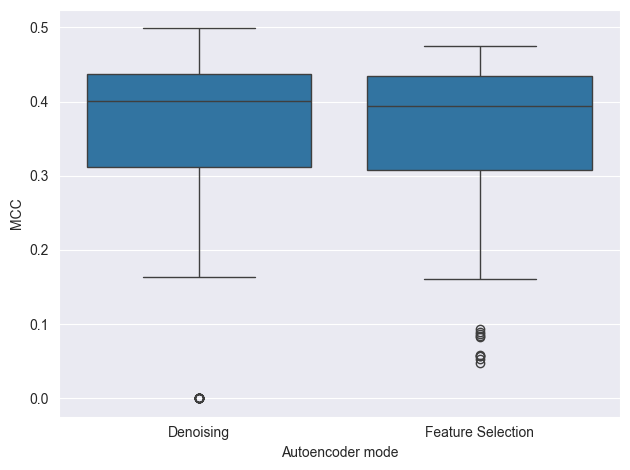

In [41]:
import seaborn as sns

MODE_NAME_MAPPING = {
    "featureselection": "Feature Selection",
    "denoising": "Denoising"
}

SHORT_MODE_NAME_MAPPING = {
    "featureselection": "FS",
    "denoising": "D"
}

smellchart_data = rfonly_results.filter(["real_mcc", "autoencoder_mode"])
smellchart_data["MCC"] = smellchart_data["real_mcc"]
smellchart_data["Autoencoder mode"] = smellchart_data["autoencoder_mode"].map(MODE_NAME_MAPPING)

mcc_mode_set = sns.boxplot(
    smellchart_data, y="MCC", x="Autoencoder mode"
)

pyplot.tight_layout()
mcc_mode_set.get_figure().savefig("mode_mcc.png")
mcc_mode_set


<Axes: xlabel='Autoencoder mode', ylabel='Precision'>

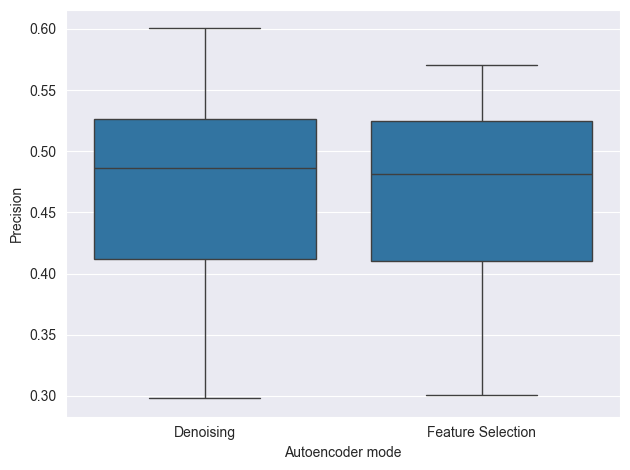

In [42]:
smellchart_data = rfonly_results.filter(["real_precision", "autoencoder_mode"])
smellchart_data["Precision"] = smellchart_data["real_precision"]
smellchart_data["Autoencoder mode"] = smellchart_data["autoencoder_mode"].map(MODE_NAME_MAPPING)

prec_mode_set = sns.boxplot(
    smellchart_data, y="Precision", x="Autoencoder mode"
)

pyplot.tight_layout()
prec_mode_set.get_figure().savefig("mode_precision.png")
prec_mode_set

<Axes: xlabel='ML model', ylabel='MCC'>

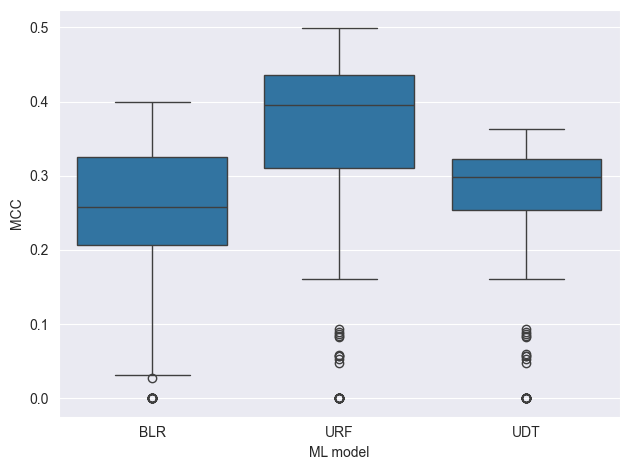

In [43]:
MODEL_NAME_MAPPING = {
    "scaled-linear-ridge": "BLR",
    "unscaled-linear": "ULR",
    "basic-randomforest": "BRF",
    "unscaled-randomforest": "URF",
    "unscaled-decisiontree": "UDT",
    "basic-adaboost": "BAB",
    "basic-gradientboost": "BGB"
}

modeltype_data = results.filter(["real_mcc", "model_type"])
modeltype_data["MCC"] = modeltype_data["real_mcc"]
modeltype_data["ML model"] = modeltype_data["model_type"].map(MODEL_NAME_MAPPING)

mcc_mode_set = sns.boxplot(
    modeltype_data, y="MCC", x="ML model"
)
pyplot.tight_layout()
mcc_mode_set.get_figure().savefig("model_mcc.png")
mcc_mode_set

<Axes: xlabel='ML model', ylabel='Precision'>

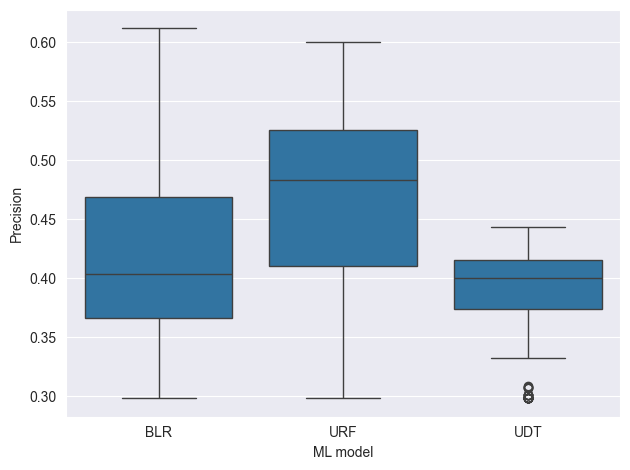

In [44]:
modeltype_data = results.filter(["real_precision", "model_type"])
modeltype_data["Precision"] = modeltype_data["real_precision"]
modeltype_data["ML model"] = modeltype_data["model_type"].map(MODEL_NAME_MAPPING)

prec_mode_set = sns.boxplot(
    modeltype_data, y="Precision", x="ML model"
)
pyplot.tight_layout()
prec_mode_set.get_figure().savefig("model_precision.png")
prec_mode_set

<Axes: xlabel='Autoencoder structure', ylabel='Precision'>

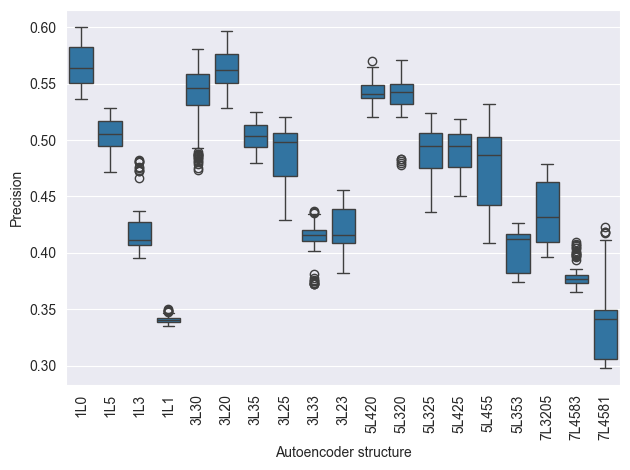

In [45]:
ARCH_NAME_MAPPING = {
    "single-layer-10-relu": "1L0",
    "single-layer-5-relu": "1L5",
    "single-layer-3-relu": "1L3",
    "single-layer-1-relu": "1L1",
    "dual-layer-30-10-relu": "3L30",
    "dual-layer-20-10-relu": "3L20",
    "dual-layer-30-5-relu": "3L35",
    "dual-layer-20-5-relu": "3L25",
    "dual-layer-30-3-relu": "3L33",
    "dual-layer-20-3-relu": "3L23",
    "triple-layer-40-20-10-relu": "5L420",
    "triple-layer-30-20-10-relu": "5L320",
    "triple-layer-30-20-5-relu": "5L325",
    "triple-layer-40-20-5-relu": "5L425",
    "triple-layer-40-15-5-relu": "5L455",
    "triple-layer-30-15-3-relu": "5L353",
    "quadruple-layer-40-20-10-5-relu": "7L3205",
    "quadruple-layer-40-15-8-3-relu": "7L4583",
    "quadruple-layer-40-15-8-1-relu": "7L4581"
}

prec_modeltype_data = rfonly_results.filter(["real_precision", "autoencoder_arch"])
prec_modeltype_data["Precision"] = prec_modeltype_data["real_precision"]
prec_modeltype_data["Autoencoder structure"] = prec_modeltype_data["autoencoder_arch"].map(ARCH_NAME_MAPPING)

prec_mode_set =sns.boxplot(
    prec_modeltype_data, y="Precision", x="Autoencoder structure"
)
pyplot.xticks(rotation=90)
pyplot.tight_layout()

prec_mode_set.get_figure().savefig("structure_precision.png")
prec_mode_set

<Axes: xlabel='Autoencoder structure', ylabel='MCC'>

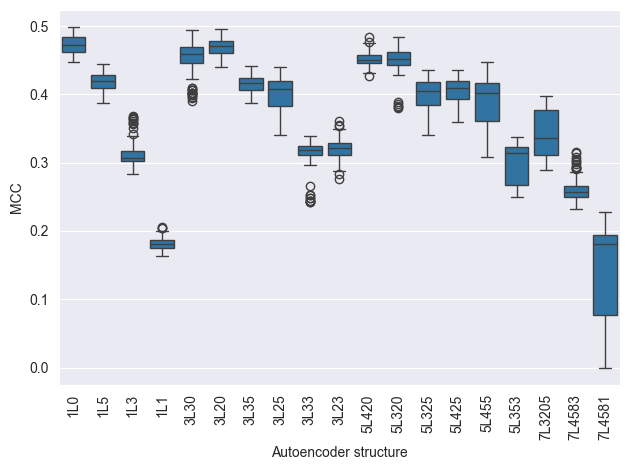

In [46]:
mcc_modeltype_data = rfonly_results.filter(["real_mcc", "autoencoder_arch"])
mcc_modeltype_data["MCC"] = mcc_modeltype_data["real_mcc"]
mcc_modeltype_data["Autoencoder structure"] = mcc_modeltype_data["autoencoder_arch"].map(ARCH_NAME_MAPPING)

mcc_mode_set = sns.boxplot(
    mcc_modeltype_data, y="MCC", x="Autoencoder structure"
)

pyplot.xticks(rotation=90)
pyplot.tight_layout()

mcc_mode_set.get_figure().savefig("structure_mcc.png")
mcc_mode_set


<Axes: xlabel='Smallest layer size', ylabel='MCC'>

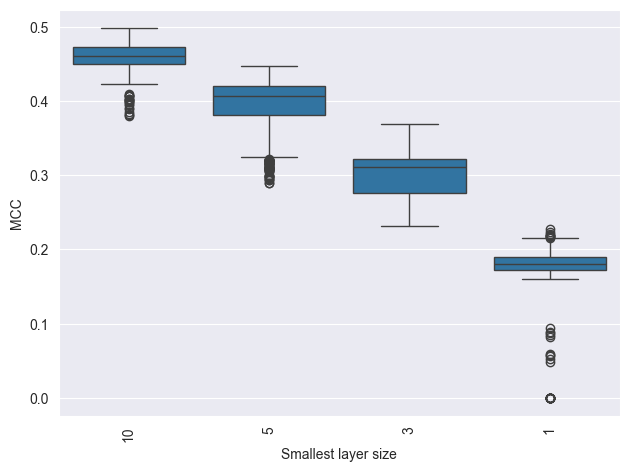

In [47]:
ARCH_NAME_MIN_MAPPING = {
    "single-layer-10-relu": "10",
    "single-layer-5-relu": "5",
    "single-layer-3-relu": "3",
    "single-layer-1-relu": "1",
    "dual-layer-30-10-relu": "10",
    "dual-layer-20-10-relu": "10",
    "dual-layer-30-5-relu": "5",
    "dual-layer-20-5-relu": "5",
    "dual-layer-30-3-relu": "3",
    "dual-layer-20-3-relu": "3",
    "triple-layer-40-20-10-relu": "10",
    "triple-layer-30-20-10-relu": "10",
    "triple-layer-30-20-5-relu": "5",
    "triple-layer-40-20-5-relu": "5",
    "triple-layer-40-15-5-relu": "5",
    "triple-layer-30-15-3-relu": "3",
    "quadruple-layer-40-20-10-5-relu": "5",
    "quadruple-layer-40-15-8-3-relu": "3",
    "quadruple-layer-40-15-8-1-relu": "1"
}

mcc_modeltype_data = rfonly_results.filter(["real_mcc", "autoencoder_arch"])
mcc_modeltype_data["MCC"] = mcc_modeltype_data["real_mcc"]
mcc_modeltype_data["Smallest layer size"] = mcc_modeltype_data["autoencoder_arch"].map(ARCH_NAME_MIN_MAPPING)

mcc_mode_set = sns.boxplot(
    mcc_modeltype_data, y="MCC", x="Smallest layer size"
)

pyplot.tight_layout()
pyplot.xticks(rotation=90)

mcc_mode_set.get_figure().savefig("min_structure_mcc.png")
mcc_mode_set


<Axes: xlabel='Smallest layer size', ylabel='Precision'>

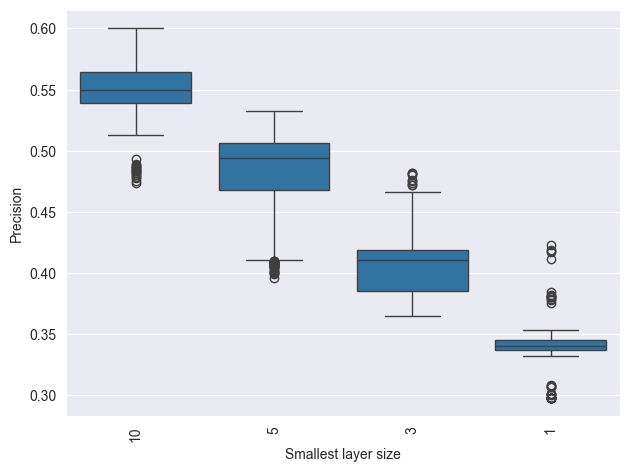

In [48]:

prec_modeltype_data = rfonly_results.filter(["real_precision", "autoencoder_arch"])
prec_modeltype_data["Precision"] = prec_modeltype_data["real_precision"]
prec_modeltype_data["Smallest layer size"] = prec_modeltype_data["autoencoder_arch"].map(ARCH_NAME_MIN_MAPPING)

prec_mode_set = sns.boxplot(
    prec_modeltype_data, y="Precision", x="Smallest layer size"
)

pyplot.tight_layout()
pyplot.xticks(rotation=90)

prec_mode_set.get_figure().savefig("min_structure_precision.png")
prec_mode_set


<Axes: xlabel='Mode - smallest layer size', ylabel='MCC'>

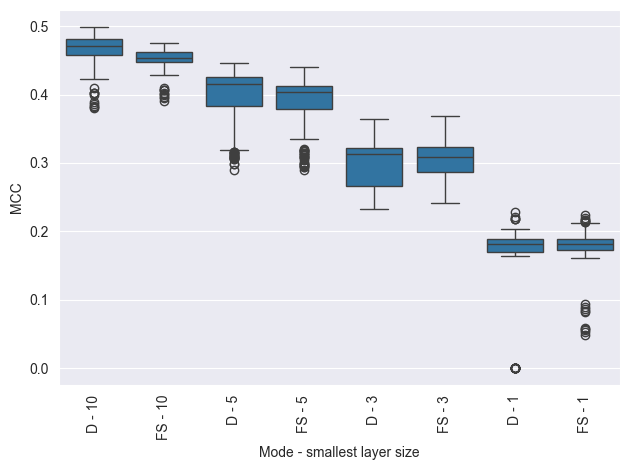

In [49]:
mcc_modeltype_data = rfonly_results.filter(["real_mcc", "autoencoder_arch", "autoencoder_mode"])
mcc_modeltype_data["MCC"] = mcc_modeltype_data["real_mcc"]
mcc_modeltype_data["Autoencoder structure"] = mcc_modeltype_data["autoencoder_arch"].map(ARCH_NAME_MIN_MAPPING)
mcc_modeltype_data["Mode - smallest layer size"] = mcc_modeltype_data["autoencoder_mode"].map(SHORT_MODE_NAME_MAPPING) + " - " + mcc_modeltype_data["Autoencoder structure"]

mcc_mode_set = sns.boxplot(
    mcc_modeltype_data, y="MCC", x="Mode - smallest layer size"
)

pyplot.xticks(rotation=90)
pyplot.tight_layout()

mcc_mode_set.get_figure().savefig("min_mode_mcc.png")
mcc_mode_set


<Axes: xlabel='Mode - smallest layer size', ylabel='Precision'>

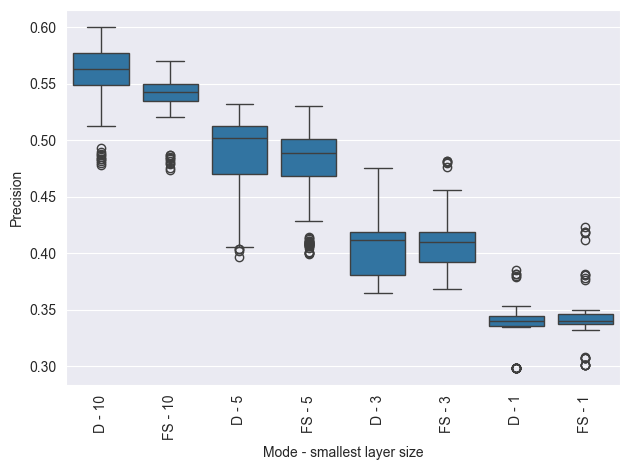

In [50]:
prec_modeltype_data = rfonly_results.filter(["real_precision", "autoencoder_arch", "autoencoder_mode"])
prec_modeltype_data["Precision"] = prec_modeltype_data["real_precision"]
prec_modeltype_data["Autoencoder structure"] = prec_modeltype_data["autoencoder_arch"].map(ARCH_NAME_MIN_MAPPING)
prec_modeltype_data["Mode - smallest layer size"] = prec_modeltype_data["autoencoder_mode"].map(SHORT_MODE_NAME_MAPPING) + " - " + prec_modeltype_data["Autoencoder structure"]

prec_mode_set = sns.boxplot(
    prec_modeltype_data, y="Precision", x="Mode - smallest layer size"
)

pyplot.xticks(rotation=90)
pyplot.tight_layout()

prec_mode_set.get_figure().savefig("min_mode_precision.png")
prec_mode_set

In [51]:

METRIC_SET_MAPPING = {
    "none": "NONE",
    "all-non-null-numeric": "ALL",
    "pydriller": "PyD",
    "product": "PD",
    "process": "PR",
    "javametrics-numeric": "JM",
    "javametrics2": "JM2",
    "javametrics2-process": "JM2R",
    "javametrics2-product": "JM2D",
    "pmd": "PMD",
    "minimal-good": "MG",
    "best-mcc": "BC",
    "best-precision": "BP"
}

MODEL_NAME_MAPPING = {
    "basic-linear-ridge": "BLR",
    "unscaled-linear": "ULR",
    "basic-randomforest": "BRF",
    "unscaled-randomforest": "URF",
    "unscaled-decisiontree": "UDT",
    "basic-adaboost": "BAB",
    "basic-gradientboost": "BGB",
    "unscaled-XGB": "XGB",
    "unscaled-LGBM": "LBGM",
    "unscaled-catboost-05": "CB",
}


cpl_partial_results = [
    "../../data/experiment1-final/r_1.csv",
    "../../data/experiment1-final/r_2.csv",
    "../../data/experiment1-final/r_3.csv",
    "../../data/experiment1-final/r_4.csv",
    "../../data/experiment1-final/r_5.csv",
    "../../data/experiment1-final/r_6.csv",
    "../../data/experiment1-final/r_7.csv",
    "../../data/experiment1-final/r_8.csv",
    "../../data/experiment1-final/r_9.csv",
    "../../data/experiment1-final/r_10.csv",
    "../../data/experiment1-final/r_11.csv",
    "../../data/experiment1-final/r_12.csv",
    "../../data/experiment1-final/r_13-gb.csv",
    "../../data/experiment1-final/r_14-cb_12.csv"
]

cpl_results = pd.concat([pd.read_csv(filepath_or_buffer=p, sep=',') for p in cpl_partial_results])

minimal_partial_results = [
    "../../data/experiment4-final/final_defects_stats.csv"
]

minimal_results = pd.concat([pd.read_csv(filepath_or_buffer=p, sep=',') for p in minimal_partial_results])


C:\Users\Ja\AppData\Local\Temp\ipykernel_1808\2735240908.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_needed['type'] = 'All metrics'
C:\Users\Ja\AppData\Local\Temp\ipykernel_1808\2735240908.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minimal_needed['type'] = 'Manual selection (9B)'
C:\Users\Ja\AppData\Local\Temp\ipykernel_1808\2735240908.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,real_precision,real_mcc,type,Precision,Type
4,0.638288,0.520926,All metrics,0.638288,All metrics
5,0.637546,0.519169,All metrics,0.637546,All metrics
6,0.673262,0.531886,All metrics,0.673262,All metrics
7,0.673832,0.533976,All metrics,0.673832,All metrics
4,0.633969,0.511302,All metrics,0.633969,All metrics
...,...,...,...,...,...
1,0.528427,0.450502,Autoencoder (10 smallest),0.528427,Autoencoder (10 smallest)
4,0.532015,0.451101,Autoencoder (10 smallest),0.532015,Autoencoder (10 smallest)
7,0.528001,0.451545,Autoencoder (10 smallest),0.528001,Autoencoder (10 smallest)
10,0.524191,0.445531,Autoencoder (10 smallest),0.524191,Autoencoder (10 smallest)


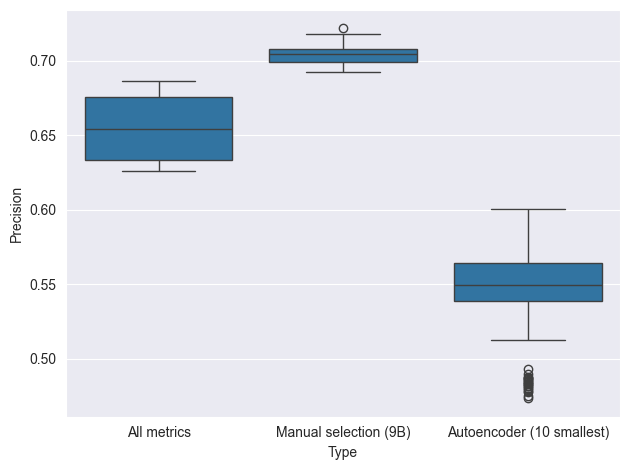

In [52]:
complete_data = cpl_results.filter(["real_precision", "real_mcc", "model_type", "metric_set"])
minimal_data = minimal_results.filter(["real_precision", "real_mcc", "model_type", "metric_set"])
autoenc_data = rfonly_results.filter(["real_precision", "real_mcc", "autoencoder_arch", "autoencoder_mode", "model_type"])

complete_needed = complete_data[complete_data["metric_set"] == "all-non-null-numeric"]
complete_needed['type'] = 'All metrics'
minimal_needed = minimal_data[minimal_data["metric_set"] == "9B"]
minimal_needed['type'] = 'Manual selection (9B)'
autoenc_needed = autoenc_data[autoenc_data["autoencoder_arch"].str.contains("-10-relu")]
autoenc_needed['type'] = 'Autoencoder (10 smallest)'

complete_rf = complete_needed[complete_needed["model_type"].str.contains("randomforest")]
minimal_rf = minimal_needed[minimal_needed["model_type"].str.contains("randomforest")]
autoenc_rf = autoenc_needed[autoenc_needed["model_type"].str.contains("randomforest")]

compare = pd.concat([
    complete_rf.filter(["real_precision", "real_mcc", "type"]),
    minimal_rf.filter(["real_precision", "real_mcc", "type"]),
    autoenc_rf.filter(["real_precision", "real_mcc", "type"])
])


compare["Precision"] = compare["real_precision"]
compare["Type"] = compare["type"]

compare_precision_chart = sns.boxplot(
    compare, y="Precision", x="Type"
)

pyplot.tight_layout()

compare_precision_chart.get_figure().savefig("autoenc_prec_others.png")
compare_precision_chart

compare

<Axes: xlabel='Type', ylabel='MCC'>

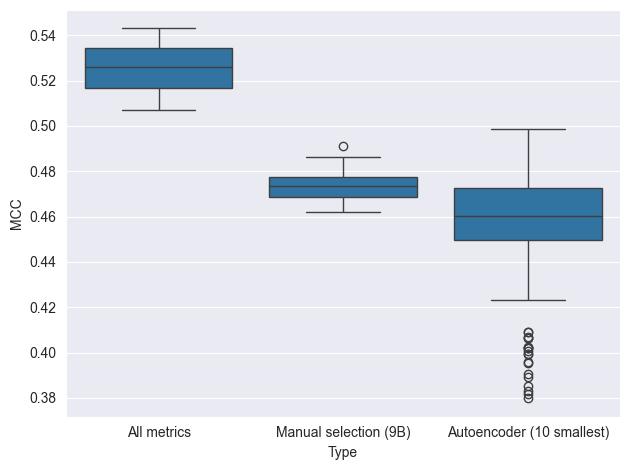

In [53]:

compare["MCC"] = compare["real_mcc"]
compare["Type"] = compare["type"]

compare_mcc_chart = sns.boxplot(
    compare, y="MCC", x="Type"
)

pyplot.tight_layout()

compare_mcc_chart.get_figure().savefig("autoenc_mcc_others.png")
compare_mcc_chart